# Multiple Linear Regression (MLR)

**Definition**:  
Multiple Linear Regression is a statistical technique that models the relationship between one dependent variable and two or more independent variables.

**Equation**:

$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + \epsilon$$

Where:
- \( Y \): Dependent variable (target to predict).
- \( X_1, X_2, \dots, X_n \): Independent variables (predictors).
- \( \beta_0 \): Intercept (value of \( Y \) when all \( X \)'s are 0).
- \( \beta_1, \beta_2, \dots, \beta_n \): Coefficients (effect of the respective \( X \)'s on \( Y \)).
- \( \epsilon \): Error term (difference between actual and predicted \( Y \)).

---

### Key Concepts:

- **Multicollinearity**: When independent variables are highly correlated with each other, leading to model instability.
  
- **Overfitting**: Adding too many variables can lead to a model that fits the noise in the data rather than the underlying trend.
  
- **R-squared**: Proportion of the variance in the dependent variable that is predictable from the independent variables.
  
- **Adjusted R-squared**: A modified version of R-squared that adjusts for the number of predictors in the model.


## Example
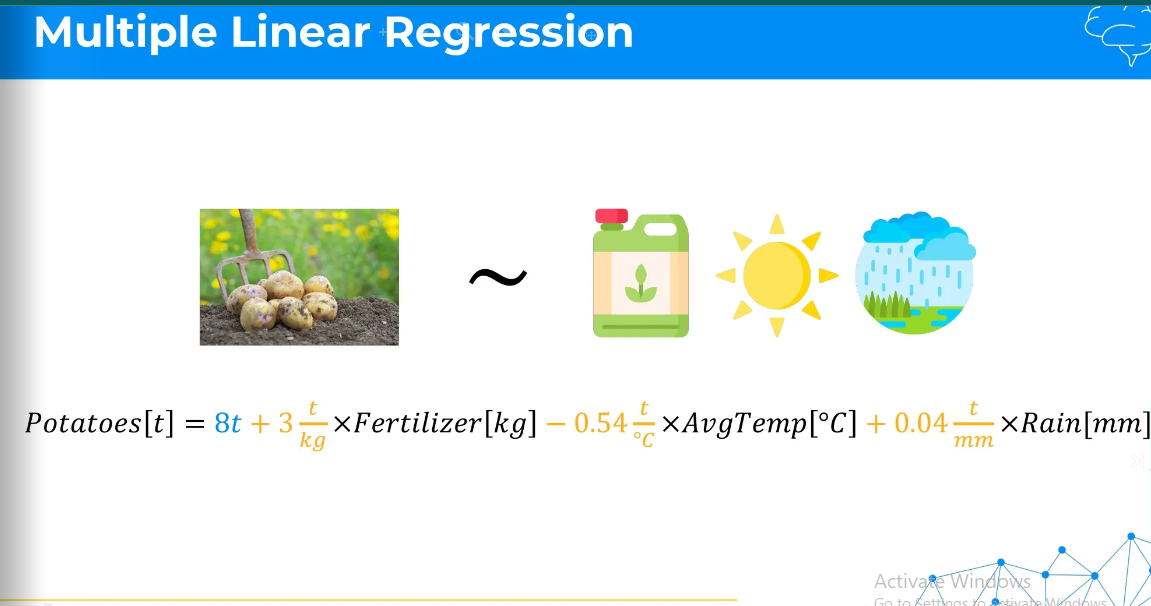

# Assumptions of Linear Regression

### 1. **Linearity**
- The relationship between the dependent variable and the independent variables should be linear.
- The change in the dependent variable is proportional to the change in the independent variables.

### 2. **Independence**
- Observations should be independent of each other.
- The values of the dependent variable should not be related to each other to ensure no correlation between residuals.

### 3. **Homoscedasticity (Constant Variance)**
- The residuals (errors) should have constant variance at all levels of the independent variables.
- **Heteroscedasticity**: If the residuals have unequal variance, it can affect confidence intervals and hypothesis tests.

### 4. **No Multicollinearity**
- Independent variables should not be highly correlated with each other.
- High multicollinearity makes it difficult to assess the individual impact of each predictor on the dependent variable.

### 5. **Normality of Errors**
- The residuals (differences between observed and predicted values) should be approximately normally distributed.
- This is especially important for hypothesis testing and calculating confidence intervals.

### 6. **No Autocorrelation**
- Relevant for time series data.
- Residuals should be independent of each other; autocorrelation occurs when errors from one observation influence errors from another.

---

Violating these assumptions can result in biased or inefficient results. If assumptions are not met, consider data transformation or alternative modeling techniques.


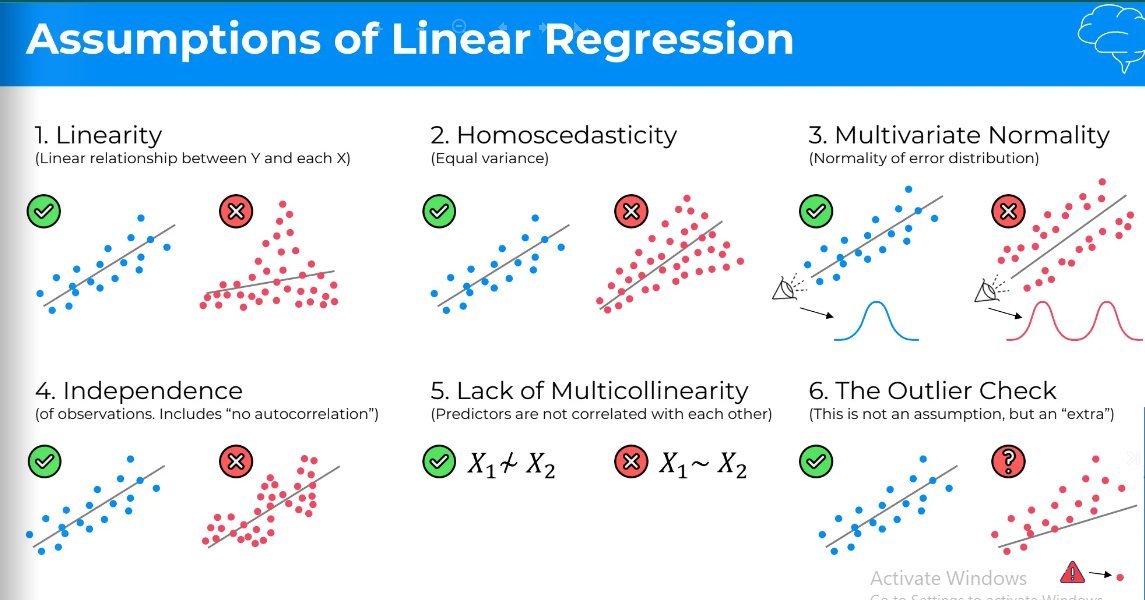

## Dummy Variables

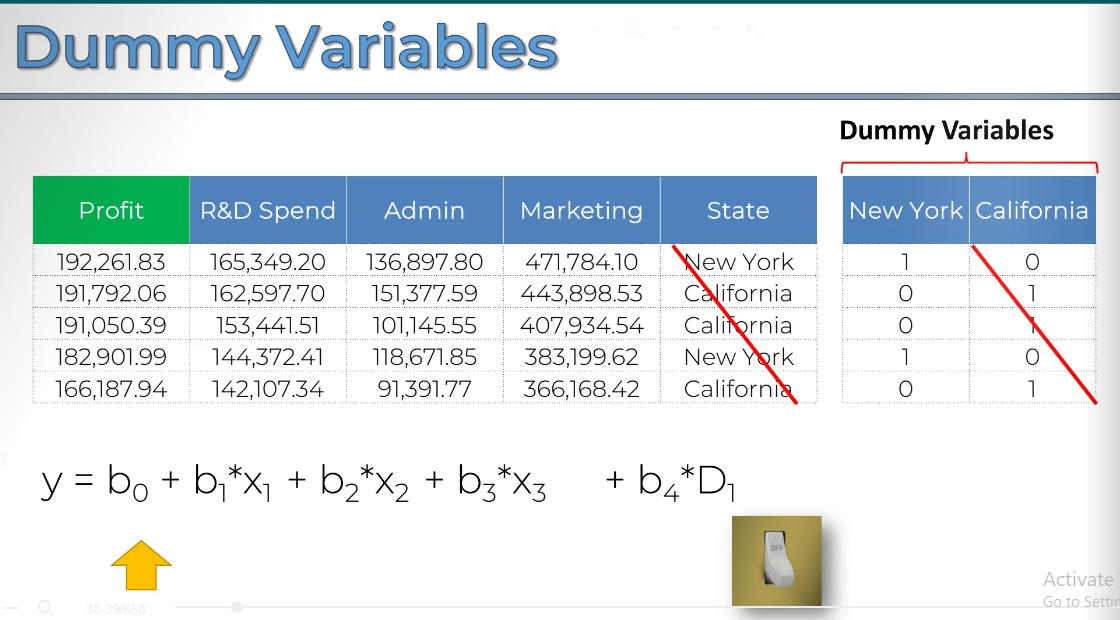

In the equation:
`y = b0 + b1*x1 + b2*x2 + b3*x3 + b4*D1`

`D1` represents the dummy variable. If the `D1` is `1` means comapny is in `New York` else it is in `California`.  

We don't need to include all the dummy variables in the equation.

## Dummy Variable Trap
The dummy variable trap occurs when you create dummy variables (also called one-hot encoded variables) from a categorical feature, and these dummy variables are highly correlated (i.e., they are multicollinear). In this context, multicollinearity means that one dummy variable can be predicted from the others, causing redundancy in the model.

### Example:
If you have a categorical variable with three categories (e.g., `red`, `blue`, `green`), and you create three dummy variables:

`red`: 1 if the color is red, 0 otherwise  
`blue`: 1 if the color is blue, 0 otherwise  
`green`: 1 if the color is green, 0 otherwise  
There is a `linear dependency` between these three dummy variables because if you know the values of two of them, you can always infer the third. For instance:

If `red = 0` and `blue = 0`, then `green = 1` (and vice versa).  
This dependency can confuse many machine learning algorithms (like linear regression) and lead to incorrect or unstable model coefficients.

### Solution:
To avoid the dummy variable trap, you can:

`Drop one of the dummy variables`: If you have `n` categories, create only `n-1` dummy variables. This removes the redundancy while preserving the information.
In the above example, you would create only two dummy variables (e.g., `red` and `blue`). If both are `0`, you know the observation corresponds to green.  
`Use regularization techniques`: In some cases, using regularization techniques like Ridge or Lasso regression can help deal with multicollinearity.

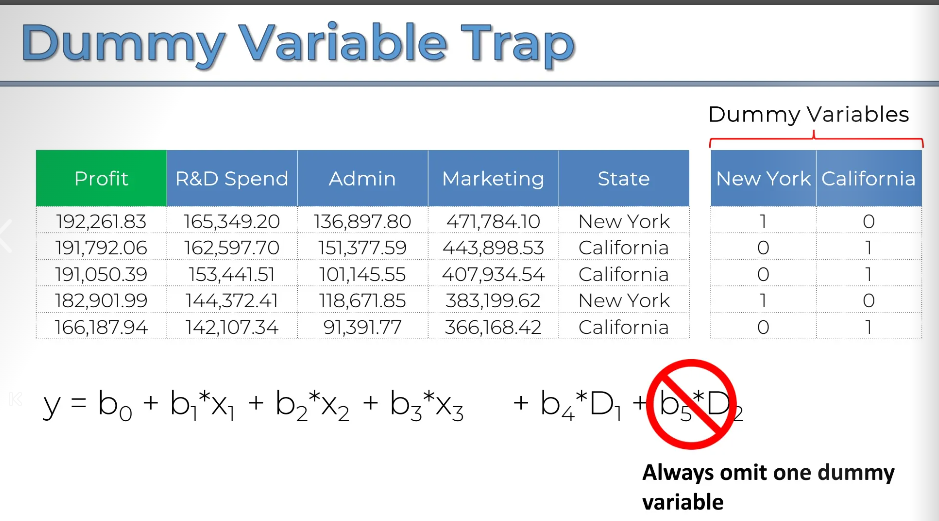

# Understanding the P-Value


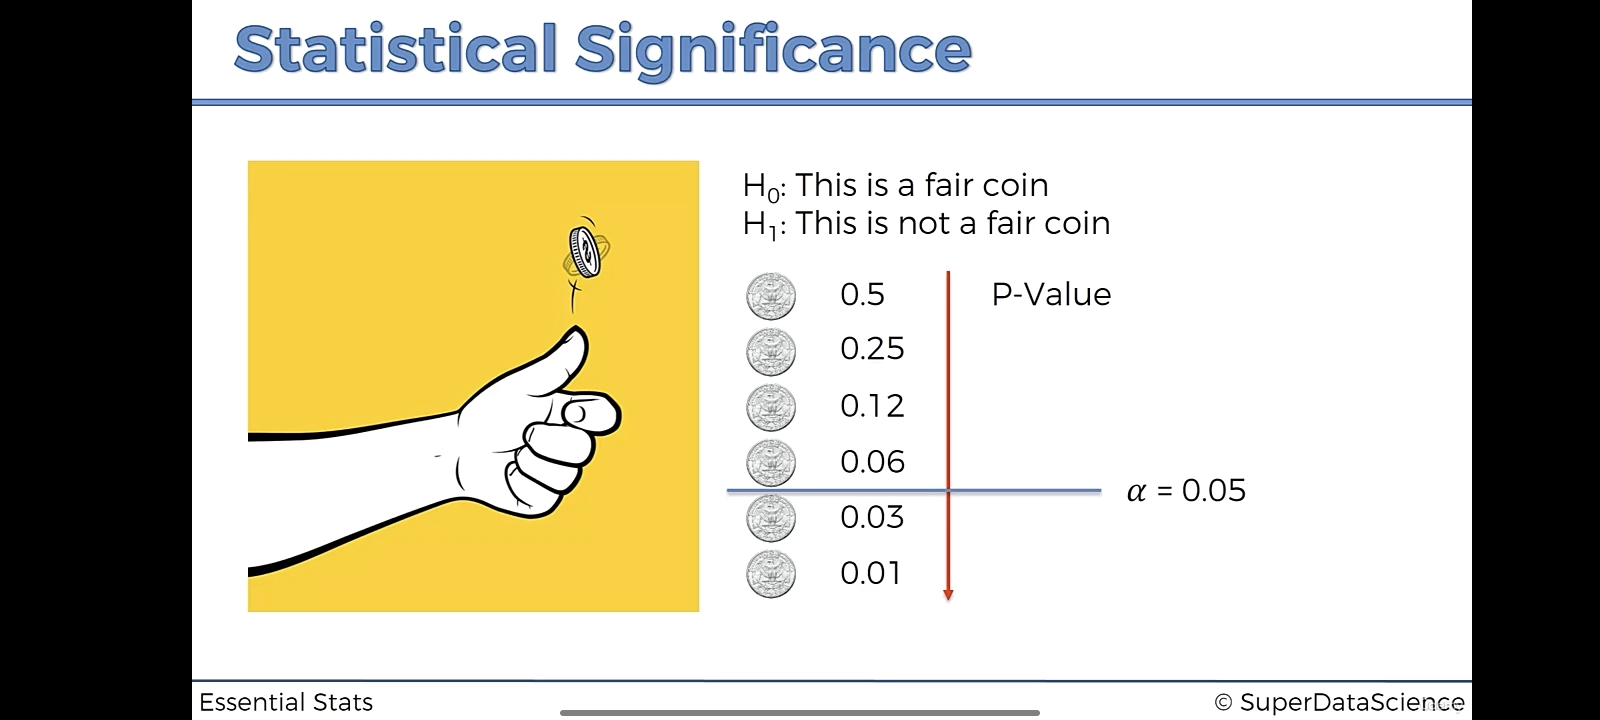

# Building A Model / Feature Selection Methods in Machine Learning

## There are 5 methods of building models


  1.   All-in
  2.   Backward Elimination
  3.   Forward Selection
  4.   Bidirectional Elimination
  5.   Scope Comparison


## 1. All-in
- **Overview**: In this approach, you use all the features (variables) in your dataset without removing any. You assume that every feature contributes to the predictive power of the model.
- **When to use**: This method is generally used when you believe that all variables are relevant or when there’s no clear way to reduce the number of features. It's common when the dataset is small or when you want to establish a baseline model.

## 2. Backward Elimination
- **Overview**: This method starts with all features in the model. Then, step by step, the least significant feature (with the highest p-value) is removed from the model. This process continues until all the remaining features are statistically significant.
- **Steps**:
  1. Fit the model with all variables.
  2. Check the significance of each feature.
  3. Remove the least significant feature (highest p-value).
  4. Refit the model and repeat the process.
- **Pros/Cons**: It ensures the removal of irrelevant features but can be computationally expensive with large datasets.

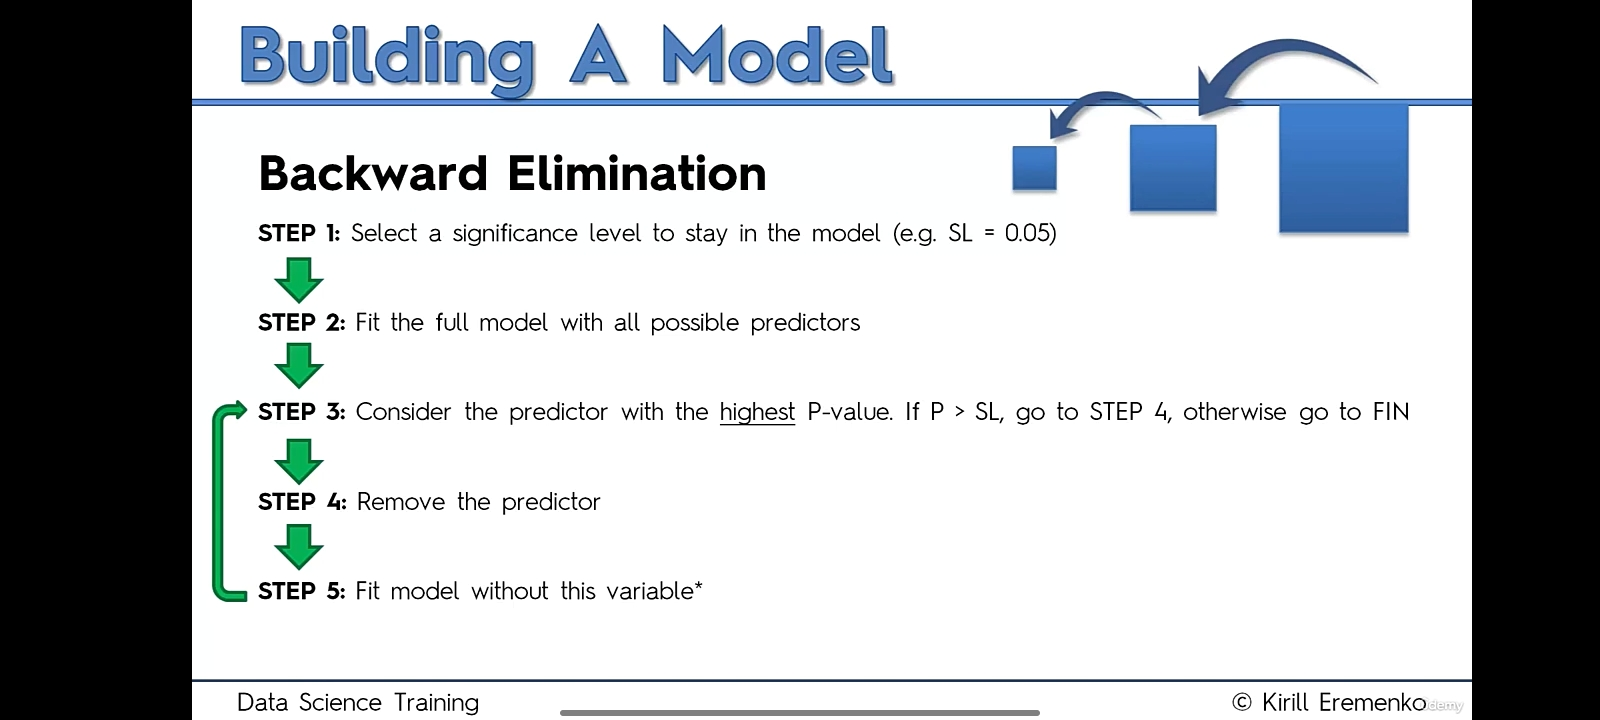

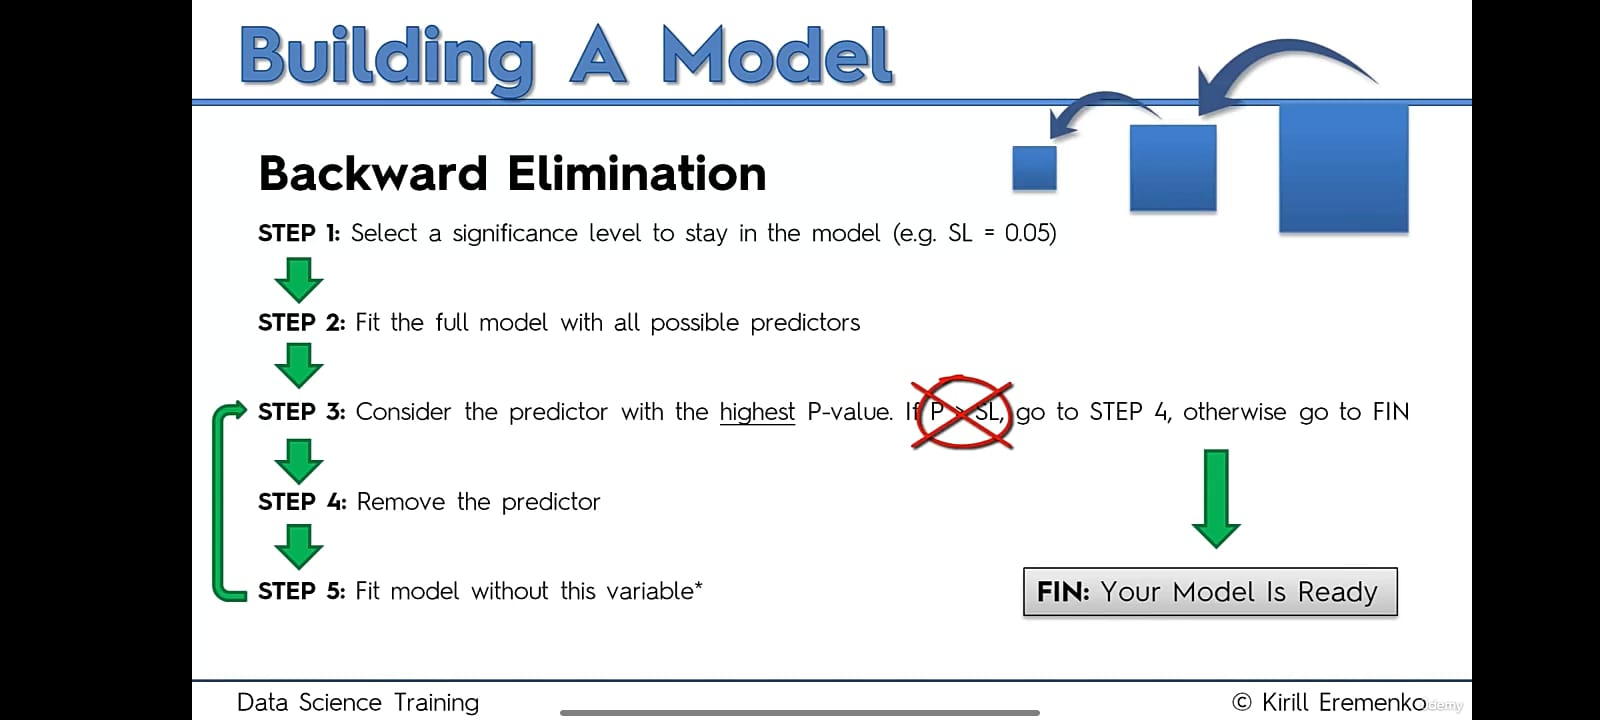

## 3. Forward Elimination
- **Overview**: This is the opposite of backward elimination. You start with an empty model (no features) and add features one by one, starting with the most significant feature. The process continues until adding further features no longer improves the model significantly.
- **Steps**:
  1. Select a significance level to enter the model (e.g. SL = 0.05).
  2. Fit all `simple Regression` models y ~ $x_n$, Select the one with lowest `P-value`.
  3. Now add other variables one by one with least P-values.

- **Pros/Cons**: This method is faster for large datasets but may miss combinations of variables that are significant only when considered together.

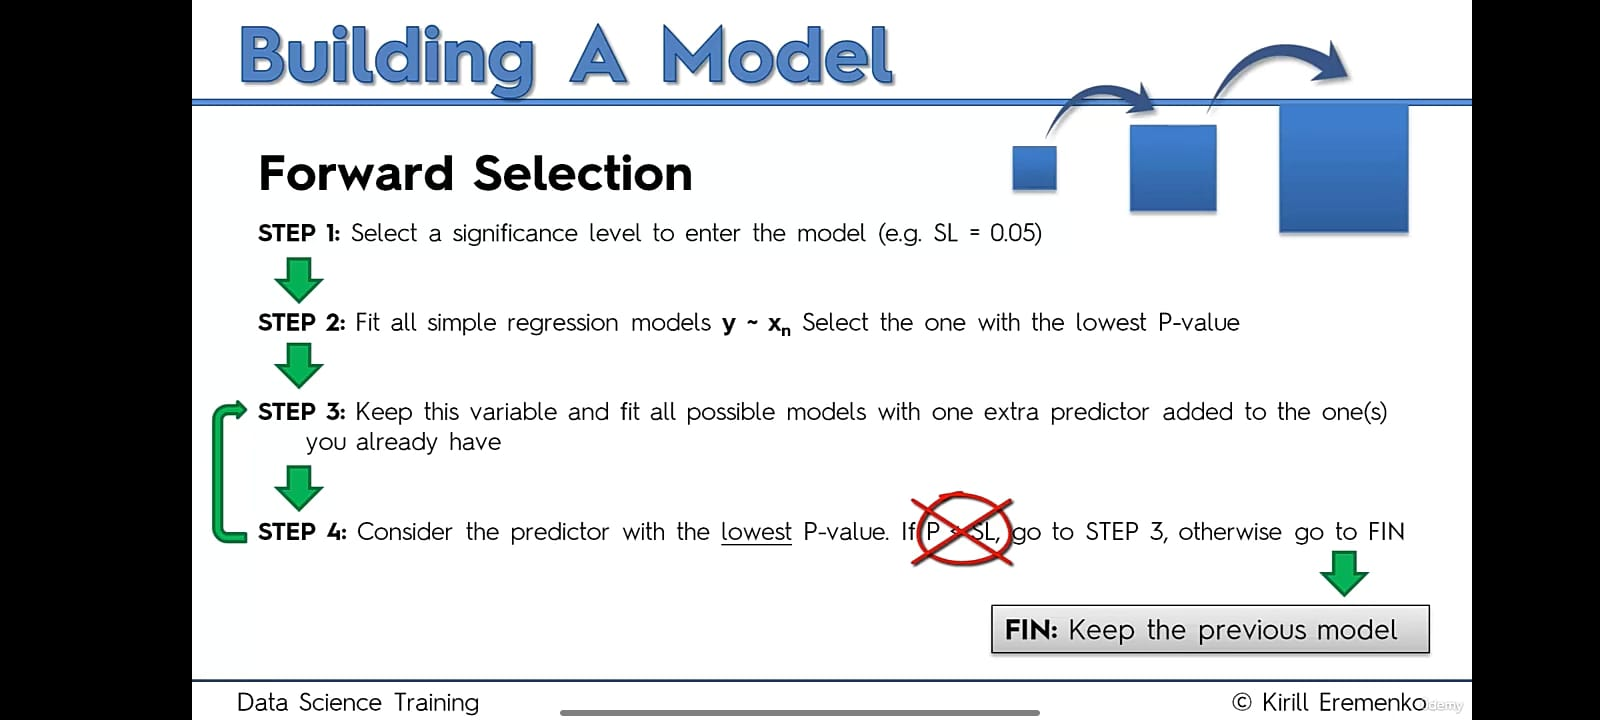

## 4. Bidirectional Elimination (Stepwise Selection)
- **Overview**: This is a combination of forward and backward elimination. You start by adding features as in forward elimination but at each step, you also check if any of the already included features have become insignificant and can be removed (as in backward elimination).
- **Steps**:
  1. Start with no variables (like forward elimination).
  2. Add variables step by step.
  3. After each addition, check if any previously added variables should be removed.
- **Pros/Cons**: More flexible and thorough than purely forward or backward elimination but computationally more expensive.

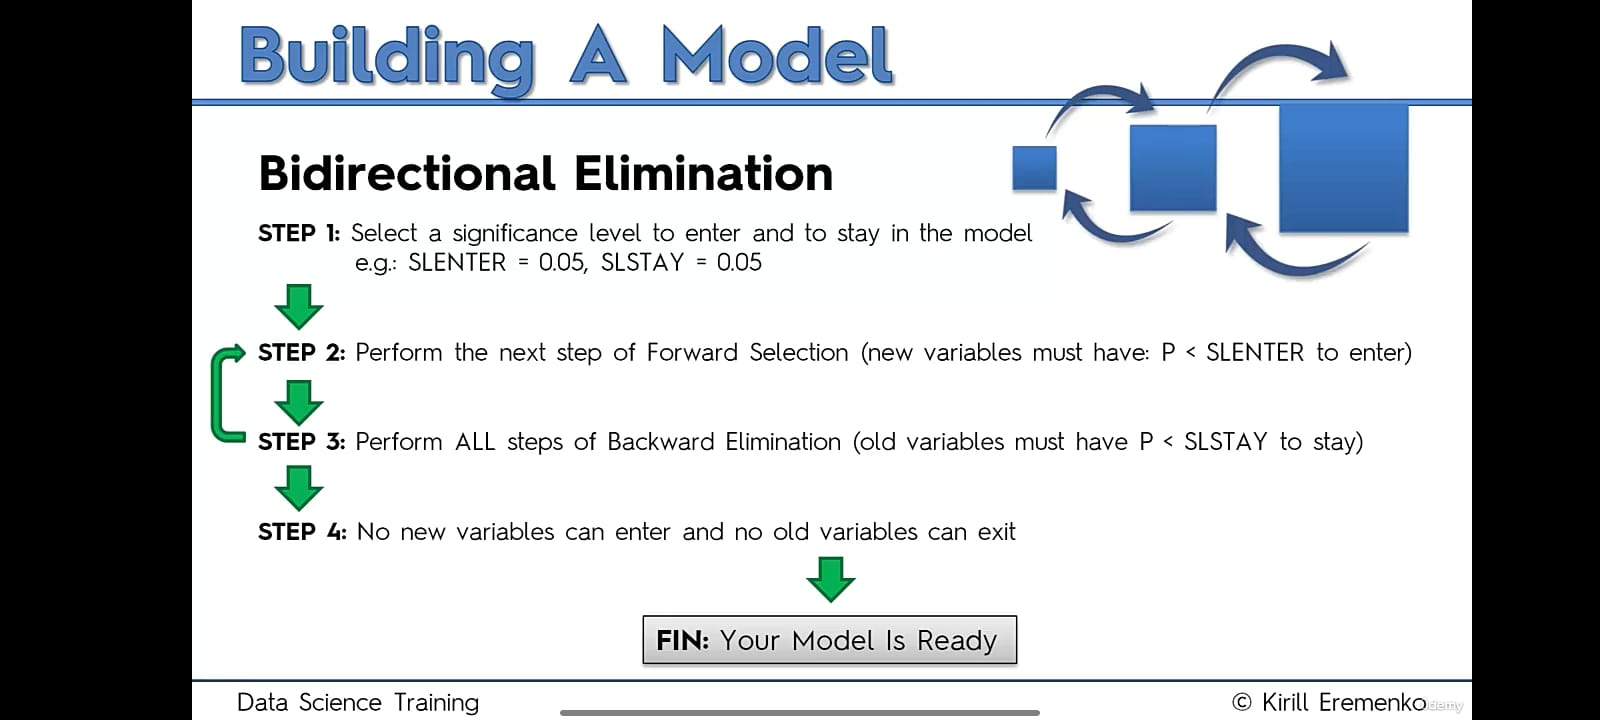

## 5. Scope Comparison (R-Squared/Adjusted R-Squared Comparison)
- **Overview**: This method compares different models (scopes) based on criteria like R-squared or adjusted R-squared. The goal is to find the best model that balances model complexity and predictive power.
- **Steps**:
  1. Create multiple models using different combinations of features.
  2. Compare their R-squared or adjusted R-squared values.
  3. Choose the model that offers the best balance between explained variance and the number of features used.
- **Pros/Cons**: It provides an overall view of different feature combinations but can be tedious when there are many features, as the number of possible combinations increases exponentially.

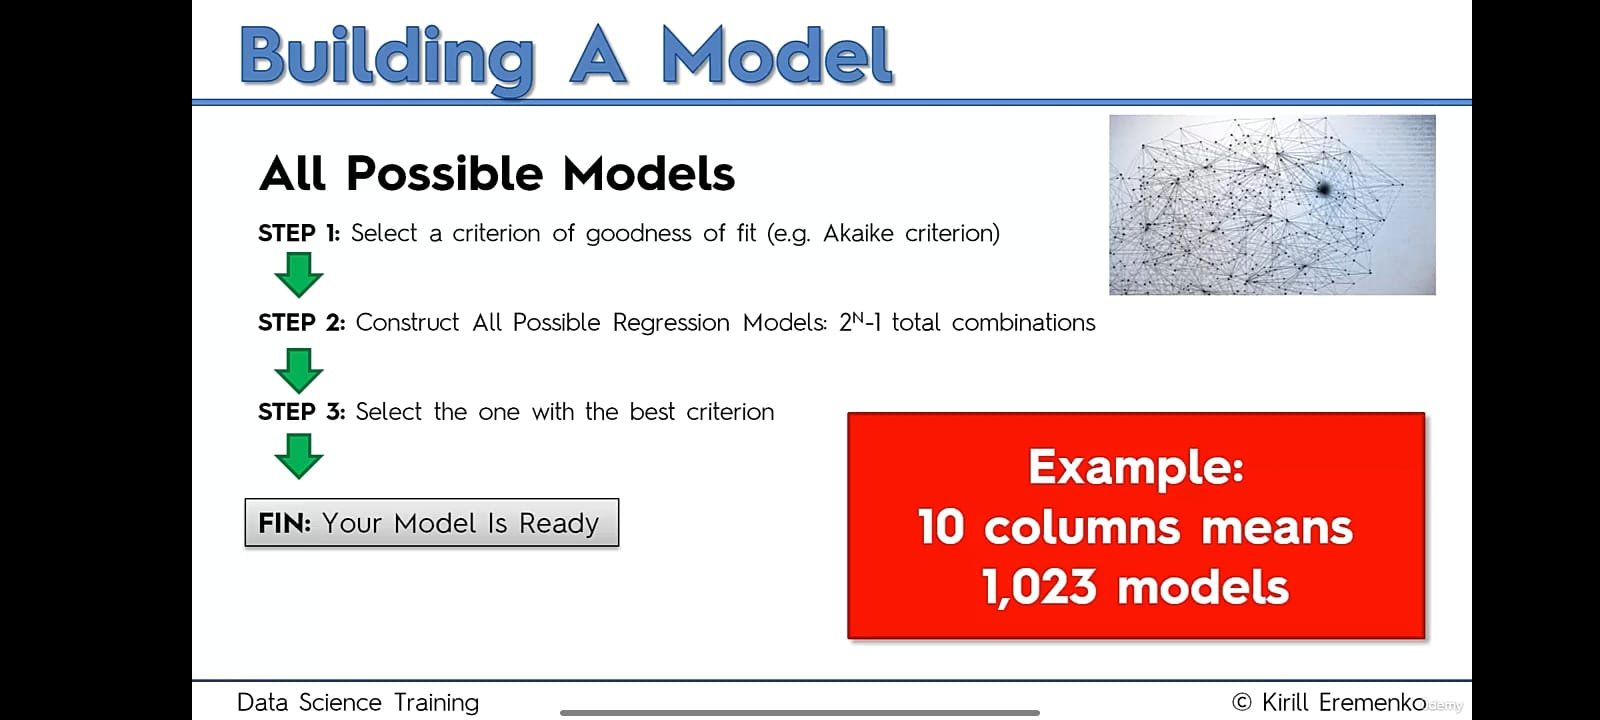




# Implementation

## Goal of our this Project:

The goal is to find out is there any relationship between the `Profit` and other expenses given i.e. `R&D Spend`, `Admin` and `Marketing`

## Data PreProcessing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('50_Startups.csv')


In [5]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Seperating Features and Targeted Variable.

In [6]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Encoding Categorical data

In [7]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [9]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3



```
There's no need to apply feature Scaling in Multiple Linear Regression Model
```



## Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the Multiple Linear Regression model on the Training set

The model automatically take care of `Dummy Variable Trap` and `selecting the best feature`.

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [13]:
y_pred = lr.predict(X_test)
np.set_printoptions(precision=2)
# printing the "Predicted Profit" and "Real Profit" together.
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1))
# axis=1 means "horizontal Concatenation."
#y_pred.reshape(len(y_pred), 1) -----> This will converts the shape of the array to display the values in vertical format.

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


The `left side` value represents the `Predicted Profit` and other one represents the `Actual Profit in test set`.